In [ ]:
#2462339_DipikaRijal
#l5cg7

In [ ]:
from google.colab import files

uploaded = files.upload()
# Select "Human_Development_Index_Dataset.csv"

Saving Human_Development_Index_Dataset.csv to Human_Development_Index_Dataset (1).csv


In [ ]:

import pandas as pd # data handling
import numpy as np # numeric operations

import matplotlib.pyplot as plt  # plots
import seaborn as sns    # for nicer plots

In [ ]:
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding='latin1')

print(" File loaded with latin1 encoding!")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

 File loaded with latin1 encoding!
Dataset shape: (6798, 30)

First 5 rows:
   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN          

In [ ]:
# Problem1A:Task 1: Extract Latest Year (2022)
print("Task 1: Get Latest Year Data")
print("-" * 30)

# Ensure 'year' is numeric and drop missing years
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

# Get latest year
latest_year = int(df['year'].max())
print(f"Latest available year: {latest_year}")

if latest_year != 2022:
    print(f"Note: Using {latest_year} (2022 not available)")

# Filter dataset for that year
hdi_2022_df = df[df['year'] == latest_year].copy()

if hdi_2022_df.empty:
    print("Warning: No rows found for the latest year. Please check the dataset.")
else:
    print(f"Countries in {latest_year}: {len(hdi_2022_df)}")

print("\n Task 1 done")


Task 1: Get Latest Year Data
------------------------------
Latest available year: 2022
Countries in 2022: 206

 Task 1 done


In [ ]:
# Problem1A: Task 2: Data Exploration for 2022
print("Task 2: Basic Exploration for 2022")
print("-" * 70)

# 1. First 10 rows
print("\nFirst 10 rows of 2022 data:")
print(hdi_2022_df.head(10))

# 2. Shape (rows, columns)
rows, cols = hdi_2022_df.shape
print(f"\nNumber of rows: {rows}")
print(f"Number of columns: {cols}")

# 3. Column names and data types
print("\nColumn names and data types:")
print(hdi_2022_df.dtypes)


Task 2: Basic Exploration for 2022
----------------------------------------------------------------------

First 10 rows of 2022 data:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  

In [ ]:
# Problem 1A: TASK 3 – DATA CLEANING

print("TASK 3: DATA CLEANING")
print("-" * 50)

# 1. Show initial number of countries in 2022
print(f"Initial dataset: {len(hdi_2022_df)} countries")

# 2. Count missing HDI values and duplicate rows before cleaning
missing_hdi = hdi_2022_df['hdi'].isna().sum()
duplicates = hdi_2022_df.duplicated().sum()

# 3. Basic cleaning: drop rows with missing HDI and remove duplicates
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi']).drop_duplicates()

# 4. Report the impact of this first cleaning step
print(f"\nCleaning results:")
print(f"• Removed {missing_hdi} rows with missing HDI")
print(f"• Removed {duplicates} duplicate rows")
print(f"• Final dataset after first clean: {len(hdi_2022_df)} countries")

# 5. Quick missing values check for all columns after initial cleaning
missing_values = hdi_2022_df.isna().sum()
if missing_values.sum() > 0:
    print(f"\nRemaining missing values:")
    print(missing_values[missing_values > 0])
else:
    print(f"\nNo missing values remaining (initial check)")


# 6. Check numeric columns that might be stored as text or contain symbols like '–'
numeric_cols = ["hdi", "life_expectancy", "gross_inc_percap"]

for col in numeric_cols:
    print(f"\nChecking column: {col}")
    print("  Sample non-numeric values (if any):")

    # Find example entries that are not simple numbers (possible text/symbols)
    non_numeric = hdi_2022_df[
        ~hdi_2022_df[col].astype(str).str.replace(".", "", regex=False).str.isnumeric()
    ][col].head()
    display(non_numeric)

    # Convert the whole column to numeric, forcing bad values to NaN
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")

# 7. After conversion, drop rows where any key numeric column is now NaN
before_rows = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi", "life_expectancy", "gross_inc_percap"])
after_rows = len(hdi_2022_df)
print(f"\nRows dropped after fixing numeric issues: {before_rows - after_rows}")
print(f"Final dataset after numeric fixes: {after_rows} countries")

# 8. Quick check for inconsistent or strange country names
print("\nNumber of unique countries in 2022:", hdi_2022_df["country"].nunique())
print("Example country names:")
print(sorted(hdi_2022_df["country"].unique())[:15])

print("\nTask 3 completed successfully!")


TASK 3: DATA CLEANING
--------------------------------------------------
Initial dataset: 206 countries

Cleaning results:
• Removed 2 rows with missing HDI
• Removed 0 duplicate rows
• Final dataset after first clean: 204 countries

Remaining missing values:
hdi_f                        11
hdi_m                        11
gross_inc_percap_f           11
gross_inc_percap_m           11
gender_development           11
gender_inequality            27
secondary_education_f_%      15
secondary_education_m_%      15
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     11
labour_participation_m_%     11
co2_emission_tons             1
mat_footprint_percap_tons    39
dtype: int64

Checking column: hdi
  Sample non-numeric values (if any):


,hdi



Checking column: life_expectancy
  Sample non-numeric values (if any):


,life_expectancy



Checking column: gross_inc_percap
  Sample non-numeric values (if any):


,gross_inc_percap



Rows dropped after fixing numeric issues: 0
Final dataset after numeric fixes: 204 countries

Number of unique countries in 2022: 204
Example country names:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh']

Task 3 completed successfully!


Data cleaning decisions for 2022 HDI

In this step I dropped rows where the **HDI value was missing**. HDI is the main variable for the analysis in Problem 1A, so rows without HDI cannot be used to compute statistics or make fair comparisons between countries. Keeping them would also change the denominator for different calculations.

I also removed **duplicate rows** to make sure each country–year combination appears only once. Duplicates could distort summary statistics (like mean HDI) and visualizations by counting the same observation multiple times. After these steps, the dataset for 2022 is cleaner and more reliable for further analysis.


Task 4: HDI Statistics (2022)
------------------------------------------------------------------------------------------------------------------------------------------------------
Mean HDI:   0.723
Median HDI: 0.740
Std Dev:    0.153

Highest HDI country:
Switzerland (0.967)

Lowest HDI country:
Somalia (0.380)


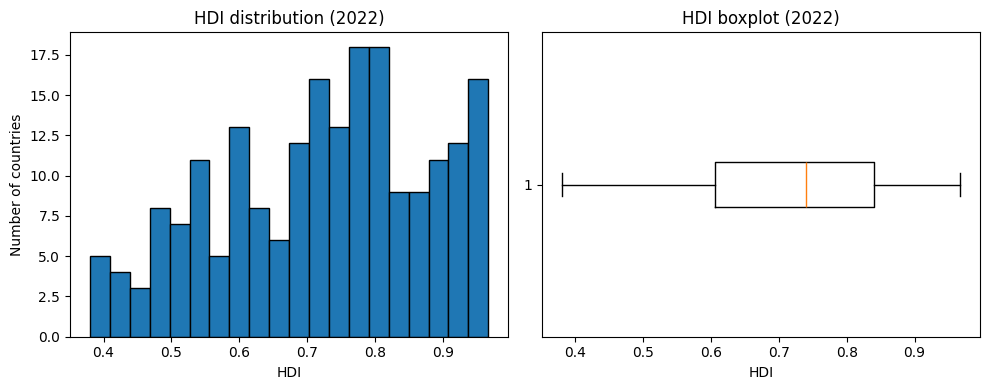

In [ ]:
# Problem1A: Task 4: Basic HDI statistics for 2022
print("Task 4: HDI Statistics (2022)")
print("-" * 150)

# Calculate basic statistics for HDI
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

# Get row with highest and lowest HDI
top_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
bottom_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

# Print numeric results
print(f"Mean HDI:   {mean_hdi:.3f}")
print(f"Median HDI: {median_hdi:.3f}")
print(f"Std Dev:    {std_hdi:.3f}")

print("\nHighest HDI country:")
print(f"{top_country['country']} ({top_country['hdi']:.3f})")

print("\nLowest HDI country:")
print(f"{bottom_country['country']} ({bottom_country['hdi']:.3f})")

# Create figure for plots
plt.figure(figsize=(10, 4))

# Histogram of HDI values
plt.subplot(1, 2, 1)
plt.hist(hdi_2022_df['hdi'], bins=20, edgecolor='black')
plt.title("HDI distribution (2022)")
plt.xlabel("HDI")
plt.ylabel("Number of countries")

# Boxplot of HDI values
plt.subplot(1, 2, 2)
plt.boxplot(hdi_2022_df['hdi'], vert=False)
plt.title("HDI boxplot (2022)")
plt.xlabel("HDI")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


This code computes summary statistics for HDI in 2022, finds the countries with the highest and lowest HDI, and visualizes the distribution using a histogram and a boxplot.

Task 5: High HDI countries (2022)
------------------------------------------------------------------------------------------------------------------------------------------------------

Countries with HDI > 0.800: 71

Top 10 by GNI per capita:
 1. Liechtenstein             GNI: $146,673  HDI: 0.942
 2. Qatar                     GNI: $95,944  HDI: 0.875
 3. Singapore                 GNI: $88,761  HDI: 0.949
 4. Ireland                   GNI: $87,468  HDI: 0.950
 5. Luxembourg                GNI: $78,554  HDI: 0.927
 6. United Arab Emirates      GNI: $74,104  HDI: 0.937
 7. Switzerland               GNI: $69,433  HDI: 0.967
 8. Norway                    GNI: $69,190  HDI: 0.966
 9. United States             GNI: $65,565  HDI: 0.927
10. Hong Kong, China (SAR)    GNI: $62,486  HDI: 0.956


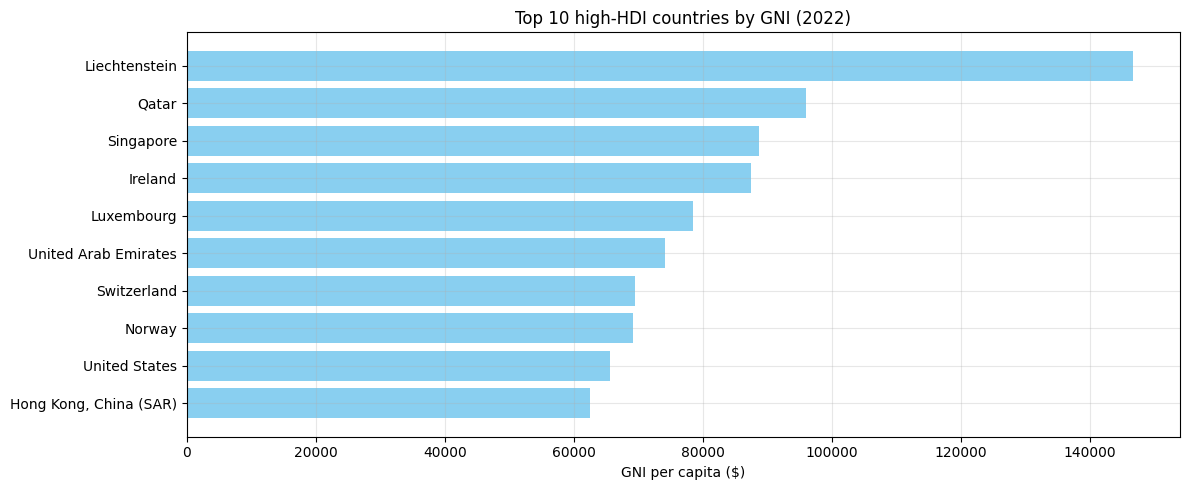


Task 5 completed


In [ ]:
# Problem1A: TASK 5: FILTER AND SORT HIGH HDI COUNTRIES

print("Task 5: High HDI countries (2022)")
print("-" * 150)
# Exact GNI column name from your dataset
gni_col = 'gross_inc_percap'

# Filter countries with HDI > 0.800
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()
print(f"\nCountries with HDI > 0.800: {len(high_hdi)}")

# Sort by GNI per capita
high_hdi_sorted = high_hdi.sort_values(gni_col, ascending=False)

print("\nTop 10 by GNI per capita:")
for i in range(min(10, len(high_hdi_sorted))):
    row = high_hdi_sorted.iloc[i]
    print(f"{i+1:2}. {row['country']:25} "
          f"GNI: ${row[gni_col]:,.0f}  HDI: {row['hdi']:.3f}")

#  VISUALIZATION
plt.figure(figsize=(12, 5))

# Take top 10 for bar chart
top_10 = high_hdi_sorted.head(10)

plt.barh(top_10['country'], top_10[gni_col], color='#89CFF0')
plt.xlabel('GNI per capita ($)')
plt.title('Top 10 high-HDI countries by GNI (2022)')
plt.gca().invert_yaxis()   # Highest at top
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTask 5 completed")


In [ ]:
# Bottom 10 countries by HDI in 2022
hdi_2022_df.sort_values('hdi', ascending=True).head(10)[['country', 'hdi']]


,country,hdi
5345,Somalia,0.380
5411,South Sudan,0.381
1088,Central African Republic,0.387
1121,Chad,0.394
4223,Niger,0.394
3563,Mali,0.410
923,Burundi,0.420
6368,Yemen,0.424
890,Burkina Faso,0.438
5180,Sierra Leone,0.458


In [ ]:
#Problem1A:
# TASK 6: ADD HDI CATEGORY COLUMN


print("Task 6: Adding HDI Category column")
print("-" * 30)

# Function to map HDI value to category
def categorize_hdi(value):
    if value < 0.550:
        return "Low"
    elif 0.550 <= value <= 0.699:
        return "Medium"
    elif 0.700 <= value <= 0.799:
        return "High"
    else:
        return "Very High"

# Work on the cleaned 2022 dataset
hdi_2022_df_clean = hdi_2022_df.copy()

# Add category column
hdi_2022_df_clean["HDI_Category"] = hdi_2022_df_clean["hdi"].apply(categorize_hdi)

# to check how many in each category
category_counts = hdi_2022_df_clean["HDI_Category"].value_counts().sort_index()
print("\nCountries per HDI category:")
print(category_counts)

# Saving final dataset
hdi_2022_df_clean.to_csv("HDI_category_added.csv", index=False)
print("\nFile saved as: HDI_category_added.csv")
print("Task 6 completed.")



Task 6: Adding HDI Category column
------------------------------

Countries per HDI category:
HDI_Category
High         54
Low          35
Medium       44
Very High    71
Name: count, dtype: int64

File saved as: HDI_category_added.csv
Task 6 completed.



We created an `HDI_Category` column for 2022 using UNDP thresholds
(Low < 0.550, Medium 0.550–0.699, High 0.700–0.799, Very High ≥ 0.800)
and saved the final dataset as `HDI_category_added.csv` for later use.

Problem1B:

In [ ]:
# PROBLEM 1B – HDI TREND ANALYSIS (2020–2022)
# Task 1: Filter years 2020–2022 and save CSV

print("Problem 1B – Task 1: Create 2020–2022 subset")
print("-" * 80)

# Make sure 'year' is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Keep only years 2020, 2021, 2022
hdi_2020_2022 = df[df['year'].isin([2020, 2021, 2022])].copy()

print(f"Rows in 2020–2022 subset: {len(hdi_2020_2022)}")
print("Years present:", sorted(hdi_2020_2022['year'].unique()))

# Saving as required
hdi_2020_2022.to_csv("HDI_problem1B.csv", index=False)
print("\nFile saved as: HDI_problem1B.csv")


Problem 1B – Task 1: Create 2020–2022 subset
--------------------------------------------------------------------------------
Rows in 2020–2022 subset: 618
Years present: [np.int64(2020), np.int64(2021), np.int64(2022)]

File saved as: HDI_problem1B.csv


In [ ]:
# PROBLEM 1B – Task 2: Data cleaning
# Focus on: hdi, country, year

print("Problem 1B – Task 2: Cleaning hdi, country, year")
print("-" * 60)

# Work on a copy
hdi_2020_2022_clean = hdi_2020_2022.copy()

# 1. Check missing values in the key columns
missing_before = hdi_2020_2022_clean[["hdi", "country", "year"]].isna().sum()
print("Missing values before cleaning:")
print(missing_before)

# 2. Drop rows where hdi, country or year is missing
hdi_2020_2022_clean = hdi_2020_2022_clean.dropna(subset=["hdi", "country", "year"])

# 3. Remove exact duplicate rows
duplicates = hdi_2020_2022_clean.duplicated().sum()
hdi_2020_2022_clean = hdi_2020_2022_clean.drop_duplicates()

print("\nRows after basic cleaning:", len(hdi_2020_2022_clean))
print("Remaining missing (hdi, country, year):")
print(hdi_2020_2022_clean[["hdi", "country", "year"]].isna().sum())
print(f"Duplicates removed: {duplicates}")

# 4. Ensure HDI is numeric (handles text or symbols like '–')
print("\nChecking HDI column for non-numeric values:")
non_numeric_hdi = hdi_2020_2022_clean[
    ~hdi_2020_2022_clean["hdi"].astype(str)
      .str.replace(".", "", regex=False)
      .str.isnumeric()
]["hdi"].head()


# Convert entire HDI column to numeric, forcing bad values to NaN
hdi_2020_2022_clean["hdi"] = pd.to_numeric(hdi_2020_2022_clean["hdi"], errors="coerce")

# Drop any new NaNs in HDI created by this conversion
before_rows = len(hdi_2020_2022_clean)
hdi_2020_2022_clean = hdi_2020_2022_clean.dropna(subset=["hdi"])
after_rows = len(hdi_2020_2022_clean)
print(f"\nRows dropped after fixing HDI numeric issues: {before_rows - after_rows}")
print(f"Final rows in cleaned dataset: {after_rows}")

# 5. Quick check for inconsistent or strange country names
print("\nNumber of unique countries (2020–2022):", hdi_2020_2022_clean["country"].nunique())
print("Example country names:")
print(sorted(hdi_2020_2022_clean["country"].unique())[:15])


Problem 1B – Task 2: Cleaning hdi, country, year
------------------------------------------------------------
Missing values before cleaning:
hdi        8
country    0
year       0
dtype: int64

Rows after basic cleaning: 610
Remaining missing (hdi, country, year):
hdi        0
country    0
year       0
dtype: int64
Duplicates removed: 0

Checking HDI column for non-numeric values:

Rows dropped after fixing HDI numeric issues: 0
Final rows in cleaned dataset: 610

Number of unique countries (2020–2022): 204
Example country names:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh']


For Problem 1B we kept only years 2020–2022 and removed rows with missing
`hdi`, `country`, or `year`, because these are essential for trend analysis.
We also dropped duplicate rows so that each country–year observation is counted once.


Problem 1B – Task 3A: HDI trends for 5 countries (2020–2022)
--------------------------------------------------------------------------------------------------------------


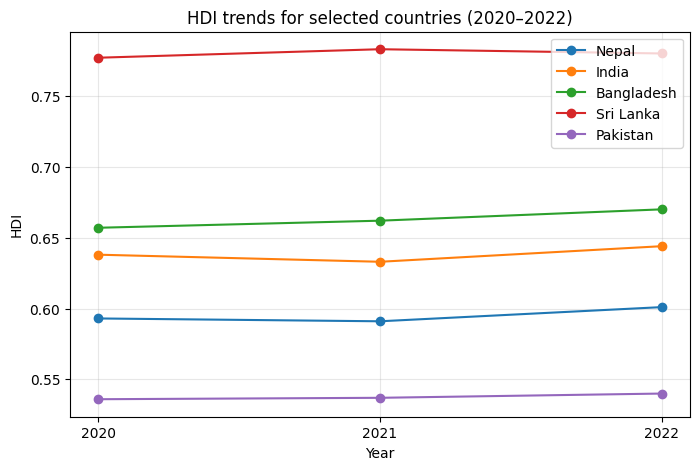

In [ ]:
# PROBLEM 1B – Task 3A: Line chart (5 countries)
print("Problem 1B – Task 3A: HDI trends for 5 countries (2020–2022)")
print("-" * 110)

# Pick any 5 countries (you can change this list)
selected_countries = ["Nepal", "India", "Bangladesh", "Sri Lanka", "Pakistan"]

# Filter for these countries
line_data = hdi_2020_2022_clean[hdi_2020_2022_clean['country'].isin(selected_countries)]

plt.figure(figsize=(8, 5))

for c in selected_countries:
    sub = line_data[line_data['country'] == c]
    plt.plot(sub['year'], sub['hdi'], marker='o', label=c)

plt.title("HDI trends for selected countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.xticks([2020, 2021, 2022])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


This line chart shows how HDI changed between 2020 and 2022 for Nepal,
India, Bangladesh, Sri Lanka, and Pakistan. The lines indicate whether
each country’s development improved, stayed stable, or declined over this period.


Problem 1B – Task 3B: Visualizations
--------------------------------------------------

[1] Bar Chart – Average HDI by Region and Year
Region column not found; cannot create region-level bar chart.

[2] Box Plot – HDI distribution by year


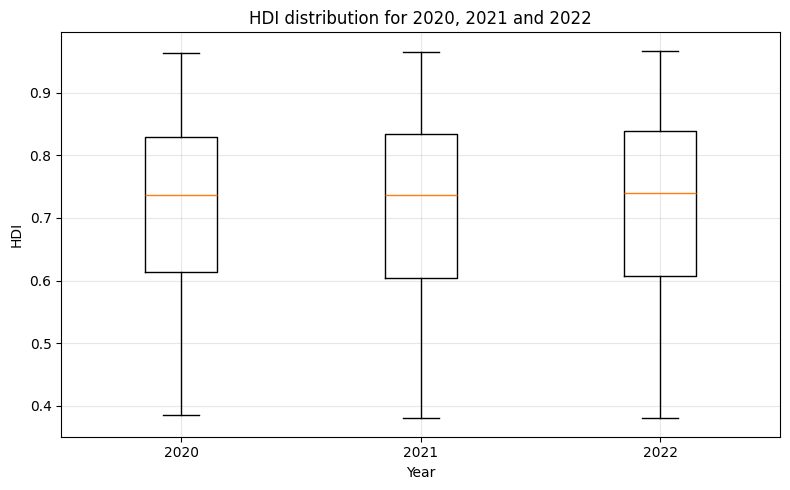

Interpretation : Compare medians and the spread of each box/whiskers to see if HDI inequality increased or decreased across years.

[3] Scatter Plot – HDI vs GNI per capita


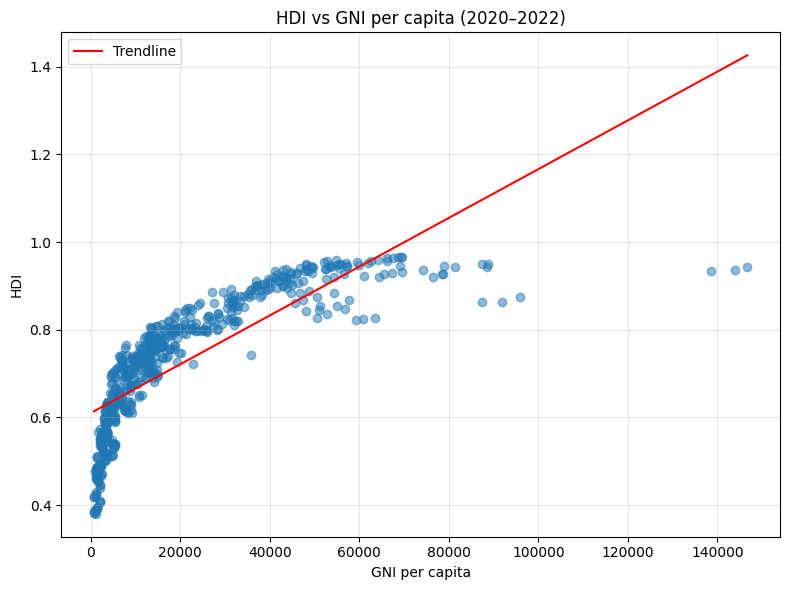

Interpretation: A clear upward trend indicates that higher income is associated with higher HDI; points far from the line are interesting anomalies.



In [ ]:
# PROBLEM 1B – Task 3B: All required visualizations

print("Problem 1B – Task 3B: Visualizations")
print("-" * 50)

gni_col = "gross_inc_percap"

# 1) Bar Chart: Average HDI by Region (2020–2022)

print("\n[1] Bar Chart – Average HDI by Region and Year")

if "region" in hdi_2020_2022_clean.columns:
    # Group by region and year and compute mean HDI
    region_year = (
        hdi_2020_2022_clean
        .groupby(["region", "year"], as_index=False)["hdi"]
        .mean()
        .rename(columns={"hdi": "mean_hdi"})
    )

    print("Sample of region-year average HDI:")
    display(region_year.head())

    plt.figure(figsize=(10, 6))
    labels = region_year["region"] + " " + region_year["year"].astype(str)
    plt.bar(labels, region_year["mean_hdi"])
    plt.xticks(rotation=90)
    plt.ylabel("Average HDI")
    plt.title("Average HDI by Region and Year (2020–2022)")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Interpretation : Regions with higher bars have higher average HDI look for regions whose bars increase or decrease over time.\n")
else:
    print("Region column not found; cannot create region-level bar chart.\n")


# 2) Box Plot: HDI Distribution for 2020, 2021, 2022

print("[2] Box Plot – HDI distribution by year")

plt.figure(figsize=(8, 5))

data_to_plot = [
    hdi_2020_2022_clean[hdi_2020_2022_clean["year"] == 2020]["hdi"],
    hdi_2020_2022_clean[hdi_2020_2022_clean["year"] == 2021]["hdi"],
    hdi_2020_2022_clean[hdi_2020_2022_clean["year"] == 2022]["hdi"],
]

plt.boxplot(data_to_plot, tick_labels=[2020, 2021, 2022])
plt.title("HDI distribution for 2020, 2021 and 2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretation : Compare medians and the spread of each box/whiskers to see if HDI inequality increased or decreased across years.\n")

# 3) Scatter Plot: HDI vs GNI per Capita

print("[3] Scatter Plot – HDI vs GNI per capita")

if gni_col in hdi_2020_2022_clean.columns:
    # Ensure numeric
    hdi_2020_2022_clean[gni_col] = pd.to_numeric(
        hdi_2020_2022_clean[gni_col], errors="coerce"
    )
    hdi_2020_2022_clean["hdi"] = pd.to_numeric(
        hdi_2020_2022_clean["hdi"], errors="coerce"
    )
    plot_df = hdi_2020_2022_clean.dropna(subset=["hdi", gni_col])

    plt.figure(figsize=(8, 6))
    plt.scatter(plot_df[gni_col], plot_df["hdi"], alpha=0.5)
    plt.xlabel("GNI per capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per capita (2020–2022)")
    plt.grid(True, alpha=0.3)

    # regression line
    m_coef, b_coef = np.polyfit(plot_df[gni_col], plot_df["hdi"], 1)
    x_vals = np.linspace(plot_df[gni_col].min(), plot_df[gni_col].max(), 200)
    plt.plot(x_vals, m_coef * x_vals + b_coef, color="red", label="Trendline")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("Interpretation: A clear upward trend indicates that higher income "
          "is associated with higher HDI; points far from the line are interesting anomalies.\n")
else:
    print('GNI per Capita variable not available in the dataset.\n')


The assignment asks for average HDI by region and year, but the provided
HDI dataset does not contain a `region` column. Because we do not have
region information for each country, it is not possible to group by region
or draw the requested regional bar chart using this dataset alone.


This box plot compares the HDI distribution across 2020, 2021, and 2022.
By looking at the medians and the spread (IQR), we can see whether overall
HDI levels are increasing and if inequality between countries is changing.


This scatter plot shows the relationship between GNI per capita and HDI for
2020–2022. Countries with higher GNI per capita tend to have higher HDI, but
there are also some points where income is high and HDI is relatively lower.


#  PROBLEM B:4 Short analysis questions:

# (a) Which countries show the greatest improvement in HDI from 2020 to 2022?
From the hdi_change results, the countries with the biggest improvement are Andorra, Azerbaijan and Ecuador, followed by Maldives and Mexico. These countries have the largest positive HDI changes between 2020 and 2022, meaning their development in health, education and income grew faster than in other countries over this period.​

# (b) Did any countries experience a decline in HDI? Provide possible reasons.
Yes, several countries experienced a decline in HDI from 2020 to 2022, including Timor‑Leste, Ukraine, Afghanistan, Namibia, Lebanon and others with smaller negative changes. Possible reasons include the impact of COVID‑19 on life expectancy, economic recessions, and in some cases conflict or political instability, which can reduce health outcomes, disrupt education and lower incomes, leading to a drop in HDI.​

# (c) Which region has the highest and lowest average HDI across these three years?
This cannot be determined from the current dataset because it does not contain a region column, so regional HDI averages for 2020–2022 cannot be calculated from this file. As a result, the analysis focuses on differences between individual countries rather than comparing regions.​

# (d) Discuss how global events (e.g., the COVID‑19 pandemic) may have affected HDI trends during this period.
Between 2020 and 2022 most countries show only small increases in HDI, and a noticeable group show declines, suggesting that global events such as the COVID‑19 pandemic slowed development progress. Higher mortality, pressure on health systems, school closures and economic shocks likely reduced life expectancy, learning outcomes and income growth, which together limited HDI improvements during this period.

In [ ]:
# PROBLEM 1B – Task 4: Short analysis questions

print("Problem 1B – Task 4: HDI changes and regional performance")
print("-" * 60)

# 1) HDI change 2020 → 2022 by country
hdi_pivot = (
    hdi_2020_2022_clean
    .pivot_table(index="country", columns="year", values="hdi")
    [[2020, 2022]]       # keep only 2020 and 2022
    .dropna()            # drop countries missing one of the years
)

hdi_pivot["hdi_change"] = hdi_pivot[2022] - hdi_pivot[2020]

# Top 5 improvements
top_improve = hdi_pivot.sort_values("hdi_change", ascending=False).head(5)
print("Top 5 countries by HDI improvement (2020 → 2022):")
display(top_improve[["hdi_change"]])

# Countries with decline
decline = hdi_pivot[hdi_pivot["hdi_change"] < 0].sort_values("hdi_change")
print("\nCountries with HDI decline (2020 → 2022):")
display(decline[["hdi_change"]])

# 2) Region averages across 2020–2022
print("\nRegional average HDI (2020–2022):")
if "region" in hdi_2020_2022_clean.columns:
    region_mean = (
        hdi_2020_2022_clean
        .groupby("region", as_index=False)["hdi"]
        .mean()
        .rename(columns={"hdi": "mean_hdi_2020_2022"})
    )
    display(region_mean)

    best_region = region_mean.loc[region_mean["mean_hdi_2020_2022"].idxmax()]
    worst_region = region_mean.loc[region_mean["mean_hdi_2020_2022"].idxmin()]

    print(
        f"\nHighest average HDI region: {best_region['region']} "
        f"({best_region['mean_hdi_2020_2022']:.3f})"
    )
    print(
        f"Lowest average HDI region:  {worst_region['region']} "
        f"({worst_region['mean_hdi_2020_2022']:.3f})"
    )
else:
    print("Region column not found; cannot compute regional averages.")

# 3) Commented for report (COVID-19 impact)
print(
    " Many countries show smaller HDI gains or even declines from 2020 to 2022, likely reflecting the impact of the COVID‑19 pandemic on health,education, and income."
)


Problem 1B – Task 4: HDI changes and regional performance
------------------------------------------------------------
Top 5 countries by HDI improvement (2020 → 2022):


year,hdi_change
country,
Andorra,0.041
Azerbaijan,0.038
Ecuador,0.031
Maldives,0.025
Mexico,0.024



Countries with HDI decline (2020 → 2022):


year,hdi_change
country,
Timor-Leste,-0.067
Ukraine,-0.028
Afghanistan,-0.026
Namibia,-0.024
Lebanon,-0.019
Saint Vincent and the Grenadines,-0.013
Suriname,-0.012
Eswatini (Kingdom of),-0.012
Gabon,-0.011



Regional average HDI (2020–2022):
Region column not found; cannot compute regional averages.
 Many countries show smaller HDI gains or even declines from 2020 to 2022, likely reflecting the impact of the COVID‑19 pandemic on health,education, and income.


# PROBLEM-2

In [ ]:
# PROBLEM 2 – Task 1: South Asia subset

print("Problem 2 – Task 1: South Asia subset")
print("-" * 100)

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter full HDI dataset for these countries
hdi_south_asia = df[df['country'].isin(south_asia_countries)].copy()

print(f"Rows in South Asia subset: {len(hdi_south_asia)}")
print("Countries included:", sorted(hdi_south_asia['country'].unique()))

# Save as required
hdi_south_asia.to_csv("HDI_SouthAsia.csv", index=False)
print("File saved as: HDI_SouthAsia.csv")


Problem 2 – Task 1: South Asia subset
----------------------------------------------------------------------------------------------------
Rows in South Asia subset: 264
Countries included: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
File saved as: HDI_SouthAsia.csv


## For Problem 2 Task 1
 I filtered the global HDI dataset to include only the
eight South Asian countries (Afghanistan, Bangladesh, Bhutan, India,
Maldives, Nepal, Pakistan, Sri Lanka) and saved the result as
`HDI_SouthAsia.csv`.


Problem 2 – Task 2: Composite development score (South Asia, 2022)
----------------------------------------------------------------------------------------------------
South Asian countries ranked by Composite Score (2022):


,country,Composite_Score,hdi
3530,Maldives,5678.289357,0.762
5477,Sri Lanka,3592.832541,0.780
659,Bhutan,3209.130864,0.681
2573,India,2105.481239,0.644
461,Bangladesh,1975.446053,0.670
4388,Pakistan,1632.210427,0.540
4091,Nepal,1228.811605,0.601
32,Afghanistan,419.425420,0.462


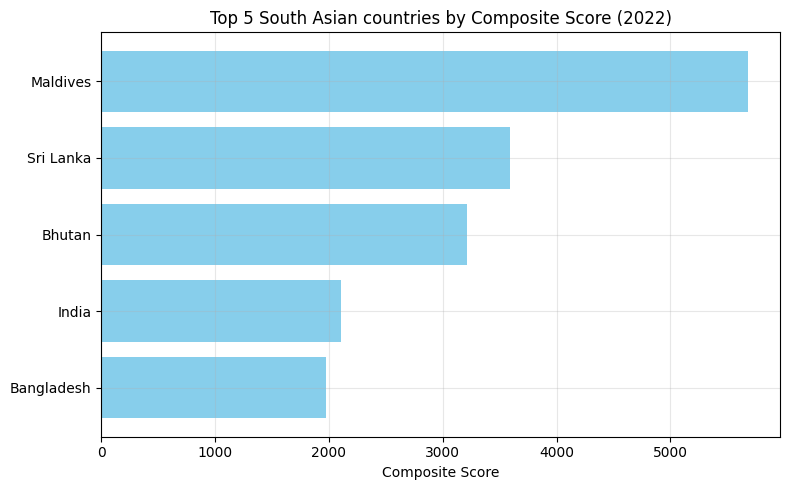


Comparison of rankings: Composite Score vs HDI


,country,hdi,Composite_Score,rank_hdi,rank_comp,rank_diff
5477,Sri Lanka,0.780,3592.832541,1.0,2.0,1.0
3530,Maldives,0.762,5678.289357,2.0,1.0,-1.0
659,Bhutan,0.681,3209.130864,3.0,3.0,0.0
461,Bangladesh,0.670,1975.446053,4.0,5.0,1.0
2573,India,0.644,2105.481239,5.0,4.0,-1.0
4091,Nepal,0.601,1228.811605,6.0,7.0,1.0
4388,Pakistan,0.540,1632.210427,7.0,6.0,-1.0
32,Afghanistan,0.462,419.425420,8.0,8.0,0.0


In [ ]:
# PROBLEM 2 – Task 2: Composite development score

print("Problem 2 – Task 2: Composite development score (South Asia, 2022)")
print("-" * 100)

# Start from the South Asia subset created in Task 1
south = hdi_south_asia.copy()

# 1. Ensure numeric types for key columns
south["life_expectancy"]   = pd.to_numeric(south["life_expectancy"], errors="coerce")
south["gross_inc_percap"]  = pd.to_numeric(south["gross_inc_percap"], errors="coerce")
south["hdi"]               = pd.to_numeric(south["hdi"], errors="coerce")

# 2. Drop rows with missing key values
south = south.dropna(subset=["life_expectancy", "gross_inc_percap", "hdi"])

# 3. Keep only latest year (2022) for ranking
south_2022 = south[south["year"] == 2022].copy()

# 4. Composite Score formula (as specified):
#    Composite Score = 0.30 * life_expectancy + 0.30 * gross_inc_percap
south_2022["Composite_Score"] = (
    0.30 * south_2022["life_expectancy"] +
    0.30 * south_2022["gross_inc_percap"]
)

# 5. Rank by Composite Score (higher is better)
south_2022 = south_2022.sort_values("Composite_Score", ascending=False)

print("South Asian countries ranked by Composite Score (2022):")
display(south_2022[["country", "Composite_Score", "hdi"]])

# 6. Horizontal bar chart – top 5 by Composite Score
top5 = south_2022.head(5)

plt.figure(figsize=(8, 5))
plt.barh(top5["country"], top5["Composite_Score"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Composite Score")
plt.title("Top 5 South Asian countries by Composite Score (2022)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Compare Composite Score ranking with HDI ranking
print("\nComparison of rankings: Composite Score vs HDI")

ranking_df = south_2022[["country", "hdi", "Composite_Score"]].copy()
ranking_df["rank_hdi"]  = ranking_df["hdi"].rank(ascending=False, method="min")
ranking_df["rank_comp"] = ranking_df["Composite_Score"].rank(ascending=False, method="min")
ranking_df["rank_diff"] = ranking_df["rank_comp"] - ranking_df["rank_hdi"]

ranking_df = ranking_df.sort_values("rank_hdi")
display(ranking_df)



The Composite Score is calculated as 0.30 × life expectancy + 0.30 × GNI per
capita for South Asian countries in 2022. I ranked the South Asian countries
by this score and compared it with their HDI values to see if any countries
move up or down when using this alternative metric.


Problem 2 – Task 3: Outliers in HDI and GNI (South Asia, 2022)
----------------------------------------------------------------------------------------------------
Outliers (HDI or GNI) in South Asia, 2022:
Empty DataFrame
Columns: [country, hdi, gross_inc_percap]
Index: []


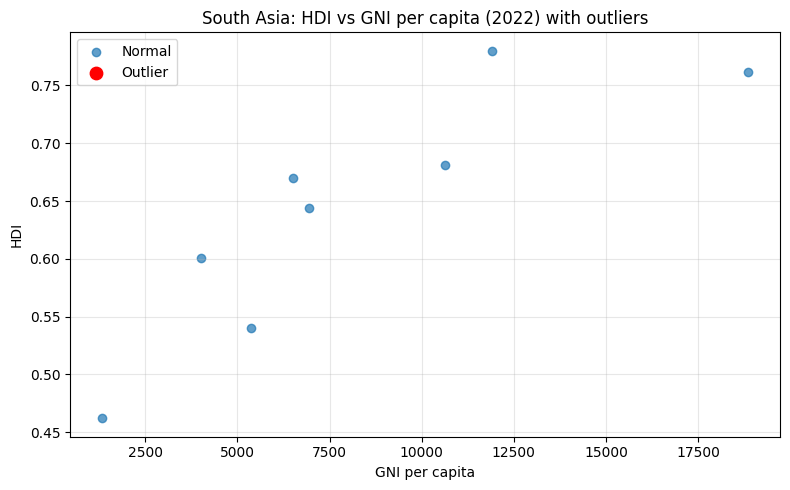

In [ ]:
# PROBLEM 2 – Task 3: Outlier detection (South Asia, 2022)


print("Problem 2 – Task 3: Outliers in HDI and GNI (South Asia, 2022)")
print("-" * 100)

sa_2022 = south_2022.copy()  # already filtered to 2022

def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

out_hdi = iqr_outliers(sa_2022['hdi'])
out_gni = iqr_outliers(sa_2022['gross_inc_percap'])
out_any = out_hdi | out_gni

print("Outliers (HDI or GNI) in South Asia, 2022:")
print(sa_2022.loc[out_any, ['country', 'hdi', 'gross_inc_percap']])

# Scatter with outliers highlighted
plt.figure(figsize=(8, 5))
plt.scatter(sa_2022['gross_inc_percap'], sa_2022['hdi'], label="Normal", alpha=0.7)
plt.scatter(sa_2022.loc[out_any, 'gross_inc_percap'],
            sa_2022.loc[out_any, 'hdi'],
            color='red', label="Outlier", s=80)

plt.xlabel("GNI per capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI per capita (2022) with outliers")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Using the 1.5 × IQR rule, I flagged outliers in HDI and GNI per capita for
South Asia in 2022. In the scatter plot, outliers appear as red points and
stand out because they have unusually high or low income or HDI compared to
other South Asian countries.


Problem 2 – Task 4: Correlation of HDI with gender development and life expectancy
Correlation (HDI vs Gender Development Index): 0.885
Correlation (HDI vs Life Expectancy):        0.928


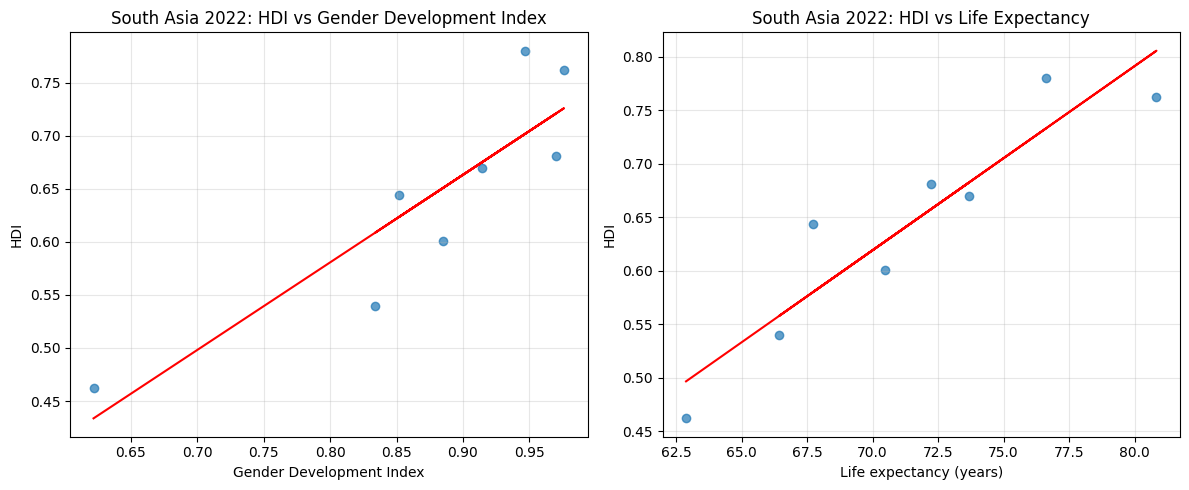

In [ ]:
# PROBLEM 2 – Task 4: Metric relationships (South Asia, 2022)


print("Problem 2 – Task 4: Correlation of HDI with gender development and life expectancy")
print("=" * 70)

# Start from South Asia 2022 data
sa_2022_corr = hdi_south_asia.copy()
sa_2022_corr = sa_2022_corr[sa_2022_corr['year'] == 2022].copy()

# Ensure numeric and drop missing
for col in ['hdi', 'gender_development', 'life_expectancy']:
    sa_2022_corr[col] = pd.to_numeric(sa_2022_corr[col], errors='coerce')

sa_2022_corr = sa_2022_corr.dropna(subset=['hdi', 'gender_development', 'life_expectancy'])

# Pearson correlations
corr_gender = sa_2022_corr['hdi'].corr(sa_2022_corr['gender_development'])
corr_life   = sa_2022_corr['hdi'].corr(sa_2022_corr['life_expectancy'])

print(f"Correlation (HDI vs Gender Development Index): {corr_gender:.3f}")
print(f"Correlation (HDI vs Life Expectancy):        {corr_life:.3f}")

# Scatter plots with simple trendlines
plt.figure(figsize=(12, 5))

# 1) HDI vs Gender Development Index
plt.subplot(1, 2, 1)
x = sa_2022_corr['gender_development']
y = sa_2022_corr['hdi']
plt.scatter(x, y, alpha=0.7)

# simple linear trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia 2022: HDI vs Gender Development Index")
plt.grid(True, alpha=0.3)

# 2) HDI vs Life Expectancy
plt.subplot(1, 2, 2)
x2 = sa_2022_corr['life_expectancy']
y2 = sa_2022_corr['hdi']
plt.scatter(x2, y2, alpha=0.7)

m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, m2*x2 + b2, color='red')

plt.xlabel("Life expectancy (years)")
plt.ylabel("HDI")
plt.title("South Asia 2022: HDI vs Life Expectancy")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


For South Asia in 2022 I computed Pearson correlations between HDI and two
components: gender development and life expectancy. The scatter plots with
trendlines show how strongly HDI moves together with each metric, and the
correlation values indicate which relationship is stronger and which one is
weaker.


Problem 2 – Task 5: GNI–HDI gap (South Asia, 2022)
Top 3 positive GNI–HDI gaps (GNI high relative to HDI):
        country  gross_inc_percap    hdi  GNI_HDI_Gap
3530   Maldives       18846.79219  0.762  18846.03019
5477  Sri Lanka       11899.49847  0.780  11898.71847
659      Bhutan       10624.87388  0.681  10624.19288

Top 3 negative GNI–HDI gaps (HDI high relative to GNI):
          country  gross_inc_percap    hdi  GNI_HDI_Gap
4388     Pakistan       5374.270423  0.540  5373.730423
4091        Nepal       4025.554685  0.601  4024.953685
32    Afghanistan       1335.205733  0.462  1334.743733


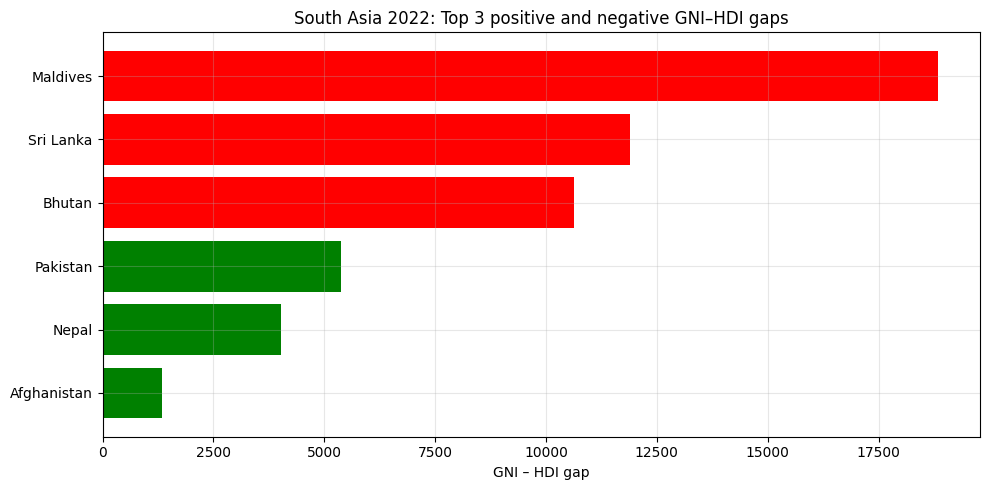

In [ ]:
# PROBLEM 2 – Task 5: GNI–HDI gap (South Asia, 2022)

print("Problem 2 – Task 5: GNI–HDI gap (South Asia, 2022)")
print("=" * 60)

sa_gap = hdi_south_asia.copy()
sa_gap = sa_gap[sa_gap['year'] == 2022].copy()

# Ensure numeric
sa_gap['gross_inc_percap'] = pd.to_numeric(sa_gap['gross_inc_percap'], errors='coerce')
sa_gap['hdi'] = pd.to_numeric(sa_gap['hdi'], errors='coerce')

sa_gap = sa_gap.dropna(subset=['gross_inc_percap', 'hdi'])

# New metric: GNI HDI Gap = gross_inc_percap - hdi
sa_gap['GNI_HDI_Gap'] = sa_gap['gross_inc_percap'] - sa_gap['hdi']

# Sort for top positive and negative gaps
sa_gap_sorted = sa_gap.sort_values('GNI_HDI_Gap', ascending=False)

top3_positive = sa_gap_sorted.head(3)
top3_negative = sa_gap_sorted.tail(3)

print("Top 3 positive GNI–HDI gaps (GNI high relative to HDI):")
print(top3_positive[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']])

print("\nTop 3 negative GNI–HDI gaps (HDI high relative to GNI):")
print(top3_negative[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']])

# Plot top 3 positive and top 3 negative
plt.figure(figsize=(10, 5))

# Combine for plotting
plot_data = pd.concat([top3_positive, top3_negative])

plt.barh(plot_data['country'], plot_data['GNI_HDI_Gap'], color=['red']*3 + ['green']*3)
plt.gca().invert_yaxis()
plt.xlabel("GNI – HDI gap")
plt.title("South Asia 2022: Top 3 positive and negative GNI–HDI gaps")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


I created a GNI–HDI gap metric defined as `gross_inc_percap − hdi` for South
Asian countries in 2022. Countries with large positive gaps have relatively
high income compared to their HDI, suggesting that their development
outcomes are lower than expected given their GNI. Countries with negative
or small gaps achieve relatively higher HDI for their income level, which
indicates more efficient conversion of income into human development.


In [ ]:
# PROBLEM 3 – Task 1: South Asia & Middle East subsets (2020–2022)


print("Problem 3 – Task 1: Create regional subsets from 2020–2022 data")
print("=" * 100)

# South Asia countries (same list as Problem 2)
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Middle East countries (from assignment)
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Use the 2020–2022 dataset from Problem 1B
sa_2020_2022 = hdi_2020_2022_clean[hdi_2020_2022_clean['country'].isin(south_asia_countries)].copy()
me_2020_2022 = hdi_2020_2022_clean[hdi_2020_2022_clean['country'].isin(middle_east_countries)].copy()

print(f"South Asia rows (2020–2022): {len(sa_2020_2022)}")
print("South Asia countries:", sorted(sa_2020_2022['country'].unique()))

print(f"\nMiddle East rows (2020–2022): {len(me_2020_2022)}")
print("Middle East countries:", sorted(me_2020_2022['country'].unique()))

# Save as required
sa_2020_2022.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_2022.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print("\nFiles saved as: HDI_SouthAsia_2020_2022.csv and HDI_MiddleEast_2020_2022.csv")


Problem 3 – Task 1: Create regional subsets from 2020–2022 data
South Asia rows (2020–2022): 24
South Asia countries: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

Middle East rows (2020–2022): 33
Middle East countries: ['Bahrain', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']

Files saved as: HDI_SouthAsia_2020_2022.csv and HDI_MiddleEast_2020_2022.csv


For Problem 3 Task 1 I used the cleaned 2020–2022 dataset and filtered it to
create South Asia and Middle East subsets based on the country lists in the
assignment. I then saved them as `HDI_SouthAsia_2020_2022.csv` and
`HDI_MiddleEast_2020_2022.csv` for further analysis.


In [ ]:
# PROBLEM 3 – Task 2: Descriptive statistics (HDI)


print("Problem 3 – Task 2: Mean and standard deviation of HDI by region (2020–2022)")
print("=" * 80)

# Ensure HDI is numeric
sa_2020_2022['hdi'] = pd.to_numeric(sa_2020_2022['hdi'], errors='coerce')
me_2020_2022['hdi'] = pd.to_numeric(me_2020_2022['hdi'], errors='coerce')

# Drop rows with missing HDI
sa_hdi = sa_2020_2022.dropna(subset=['hdi'])
me_hdi = me_2020_2022.dropna(subset=['hdi'])

# Compute mean and std for each region across 2020–2022
sa_mean = sa_hdi['hdi'].mean()
sa_std  = sa_hdi['hdi'].std()

me_mean = me_hdi['hdi'].mean()
me_std  = me_hdi['hdi'].std()

print(f"South Asia:   mean HDI = {sa_mean:.3f}, std = {sa_std:.3f}")
print(f"Middle East:  mean HDI = {me_mean:.3f}, std = {me_std:.3f}")

if me_mean > sa_mean:
    print("\nOn average, the Middle East has a higher HDI than South Asia (2020–2022).")
else:
    print("\nOn average, South Asia has a higher HDI than the Middle East (2020–2022).")


Problem 3 – Task 2: Mean and standard deviation of HDI by region (2020–2022)
South Asia:   mean HDI = 0.640, std = 0.098
Middle East:  mean HDI = 0.789, std = 0.141

On average, the Middle East has a higher HDI than South Asia (2020–2022).


# For Problem 3 Task 2
I calculated the mean and standard deviation of HDI for
South Asia and the Middle East over 2020–2022. Comparing the average HDI
values shows which region performs better overall in this period, while the
standard deviations show how much HDI varies inside each region.


In [ ]:
print(hdi_2020_2022_clean.columns)
#running this to see the exact column names:


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')


PROBLEM 3 – Task 3: Top and bottom HDI performers in each region (2020–2022)

South Asia – Top 3 countries by mean HDI (2020–2022):
  country  mean_hdi
Sri Lanka  0.780000
 Maldives  0.750667
   Bhutan  0.677667

South Asia – Bottom 3 countries by mean HDI (2020–2022):
    country  mean_hdi
Afghanistan  0.474333
   Pakistan  0.537667
      Nepal  0.595000

Middle East – Top 3 countries by mean HDI (2020–2022):
             country  mean_hdi
United Arab Emirates  0.932667
              Israel  0.910667
             Bahrain  0.885333

Middle East – Bottom 3 countries by mean HDI (2020–2022):
country  mean_hdi
  Yemen  0.426333
   Iraq  0.667000
Lebanon  0.730000


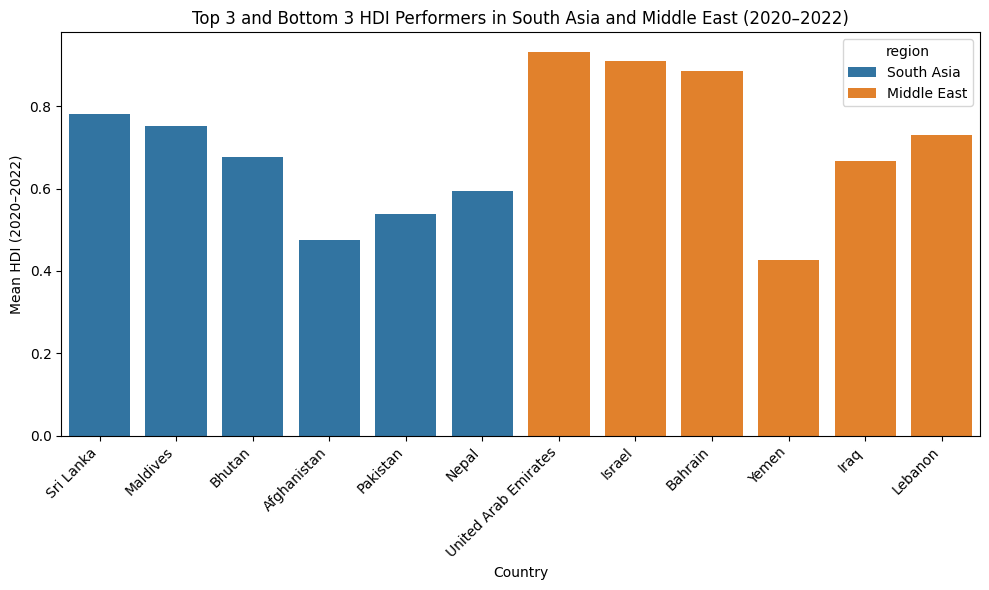

In [ ]:
# PROBLEM 3 – Task 3: Top and Bottom Performers

print("PROBLEM 3 – Task 3: Top and bottom HDI performers in each region (2020–2022)")


# Ensure HDI is numeric for both regions
sa_2020_2022['hdi'] = pd.to_numeric(sa_2020_2022['hdi'], errors='coerce')
me_2020_2022['hdi'] = pd.to_numeric(me_2020_2022['hdi'], errors='coerce')

# Compute mean HDI per country over 2020–2022 for South Asia
sa_country_hdi = (
    sa_2020_2022
    .dropna(subset=['hdi'])
    .groupby('country', as_index=False)['hdi']
    .mean()
    .rename(columns={'hdi': 'mean_hdi'})
)

# Compute mean HDI per country over 2020–2022 for Middle East
me_country_hdi = (
    me_2020_2022
    .dropna(subset=['hdi'])
    .groupby('country', as_index=False)['hdi']
    .mean()
    .rename(columns={'hdi': 'mean_hdi'})
)

# Select top 3 and bottom 3 countries in South Asia
sa_top3 = sa_country_hdi.sort_values('mean_hdi', ascending=False).head(3)
sa_bottom3 = sa_country_hdi.sort_values('mean_hdi', ascending=True).head(3)

# Select top 3 and bottom 3 countries in Middle East
me_top3 = me_country_hdi.sort_values('mean_hdi', ascending=False).head(3)
me_bottom3 = me_country_hdi.sort_values('mean_hdi', ascending=True).head(3)

print("\nSouth Asia – Top 3 countries by mean HDI (2020–2022):")
print(sa_top3.to_string(index=False))

print("\nSouth Asia – Bottom 3 countries by mean HDI (2020–2022):")
print(sa_bottom3.to_string(index=False))

print("\nMiddle East – Top 3 countries by mean HDI (2020–2022):")
print(me_top3.to_string(index=False))

print("\nMiddle East – Bottom 3 countries by mean HDI (2020–2022):")
print(me_bottom3.to_string(index=False))

# Add region labels for plotting
sa_top3['region'] = 'South Asia'
sa_bottom3['region'] = 'South Asia'
me_top3['region'] = 'Middle East'
me_bottom3['region'] = 'Middle East'

# Combine all selected countries into one dataframe
plot_df = pd.concat([sa_top3, sa_bottom3, me_top3, me_bottom3], ignore_index=True)

# Bar chart comparing top and bottom performers in both regions
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='country',
    y='mean_hdi',
    hue='region'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean HDI (2020–2022)')
plt.xlabel('Country')
plt.title('Top 3 and Bottom 3 HDI Performers in South Asia and Middle East (2020–2022)')
plt.tight_layout()
plt.show()


For Problem 3 Task 3 I calculated the mean HDI for each country in South
Asia and the Middle East over 2020–2022 and then selected the top three and
bottom three countries in each region. The bar chart compares these countries
across the two regions, showing which ones have consistently higher human
development and which ones lag behind during this period.


PROBLEM 3 – Task 4: Metric comparisons across regions (2020–2022)


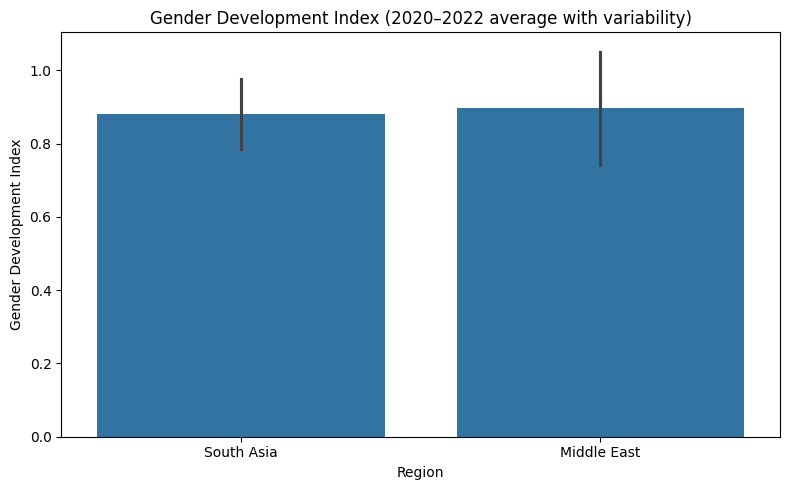

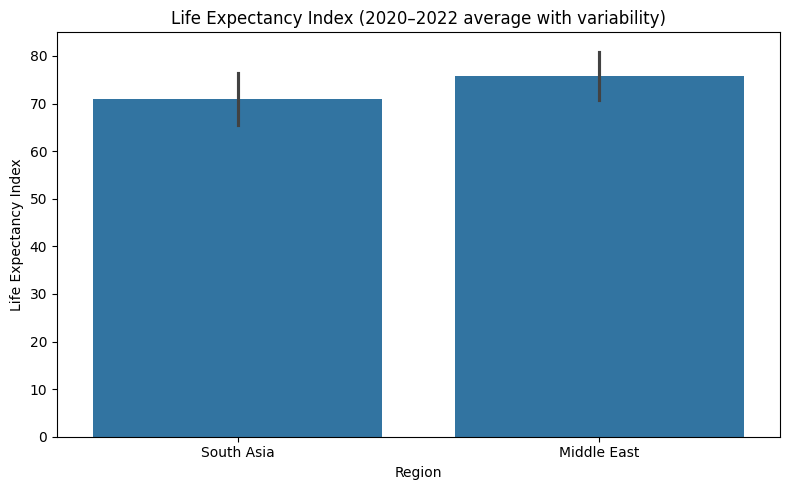

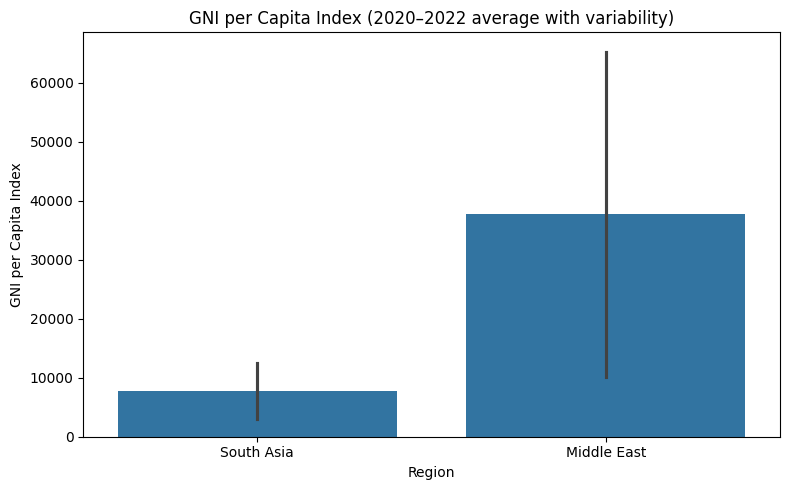

In [ ]:
# PROBLEM 3 – Task 4: Metric Comparisons (gender, life expectancy, GNI index)

print("PROBLEM 3 – Task 4: Metric comparisons across regions (2020–2022)")
print("=" * 80)

# Define the three metric columns and their descriptive labels
metrics = {
    "gender_development": "Gender Development Index",
    "life_expectancy": "Life Expectancy Index",
    "gross_inc_percap": "GNI per Capita Index"
}

# Convert metric columns to numeric for both regions
for col in metrics.keys():
    sa_2020_2022[col] = pd.to_numeric(sa_2020_2022[col], errors='coerce')
    me_2020_2022[col] = pd.to_numeric(me_2020_2022[col], errors='coerce')

# Create copies and add a region label so we can plot both together
sa_temp = sa_2020_2022.copy()
me_temp = me_2020_2022.copy()
sa_temp["region"] = "South Asia"
me_temp["region"] = "Middle East"

# Combine South Asia and Middle East rows into one dataframe
combined = pd.concat([sa_temp, me_temp], ignore_index=True)

# Create one bar chart per metric, comparing the two regions
for col, label in metrics.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=combined,
        x="region",
        y=col,
        errorbar="sd"   # show standard deviation as error bars
    )
    plt.ylabel(label)
    plt.xlabel("Region")
    plt.title(f"{label} (2020–2022 average with variability)")
    plt.tight_layout()
    plt.show()


For Problem 3 Task 4 I compared the gender development, life expectancy and
GNI per capita indices between South Asia and the Middle East using the
2020–2022 data. The grouped bar charts show which region scores higher on
each metric and which indicator has the largest gap between the two regions.


In [ ]:
# PROBLEM 3 – Task 5: HDI Disparity (Range and Coefficient of Variation)

print("PROBLEM 3 – Task 5: HDI range and coefficient of variation by region")
print("=" * 80)

# Helper function to compute range and CV for one region
def disparity_stats(df, region_name):
    # Ensure HDI is numeric and drop missing values
    hdi_vals = pd.to_numeric(df["hdi"], errors="coerce").dropna()

    # Basic statistics
    hdi_range = hdi_vals.max() - hdi_vals.min()   # max - min
    hdi_mean = hdi_vals.mean()
    hdi_std = hdi_vals.std()

    # Coefficient of variation (relative spread)
    cv = hdi_std / hdi_mean if hdi_mean != 0 else float("nan")

    # Print results for the region
    print(f"\n{region_name}:")
    print(f"  HDI range (max - min): {hdi_range:.3f}")
    print(f"  Mean HDI:              {hdi_mean:.3f}")
    print(f"  Std dev HDI:           {hdi_std:.3f}")
    print(f"  Coefficient of variation (CV): {cv:.3f}")

    return hdi_range, cv

# Compute disparity measures for both regions
sa_range, sa_cv = disparity_stats(sa_2020_2022, "South Asia")
me_range, me_cv = disparity_stats(me_2020_2022, "Middle East")

# Compare which region has more relative variation in HDI
if sa_cv > me_cv:
    print("\nSouth Asia shows more relative variation in HDI (higher CV).")
else:
    print("\nThe Middle East shows more relative variation in HDI (higher CV).")


PROBLEM 3 – Task 5: HDI range and coefficient of variation by region

South Asia:
  HDI range (max - min): 0.321
  Mean HDI:              0.640
  Std dev HDI:           0.098
  Coefficient of variation (CV): 0.154

Middle East:
  HDI range (max - min): 0.513
  Mean HDI:              0.789
  Std dev HDI:           0.141
  Coefficient of variation (CV): 0.179

The Middle East shows more relative variation in HDI (higher CV).


For Problem 3 Task 5 I calculated the HDI range and coefficient of variation
for South Asia and the Middle East from 2020–2022. The range shows the gap
between the lowest and highest HDI values, while the CV reveals which region
has more relative variation in human development.


PROBLEM 3 – Task 6: Correlations of HDI with gender development and life expectancy

South Asia:
  Corr(HDI, Gender Development):   0.874
  Corr(HDI, Life Expectancy):      0.939


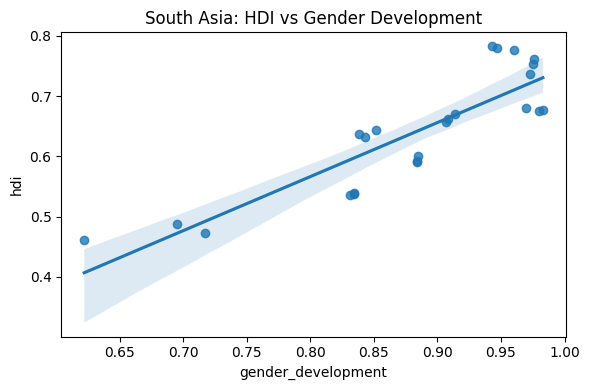

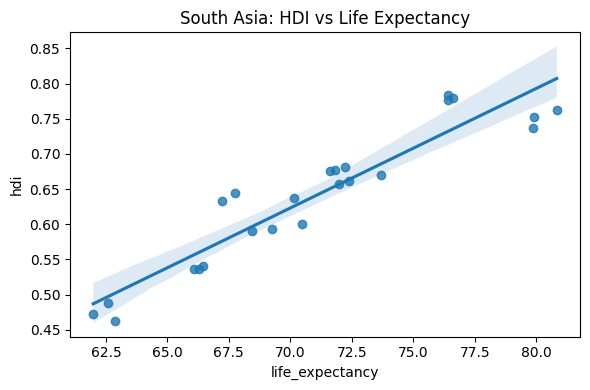


Middle East:
  Corr(HDI, Gender Development):   0.936
  Corr(HDI, Life Expectancy):      0.933


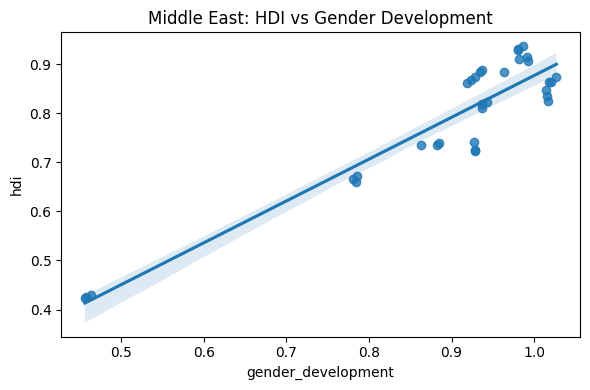

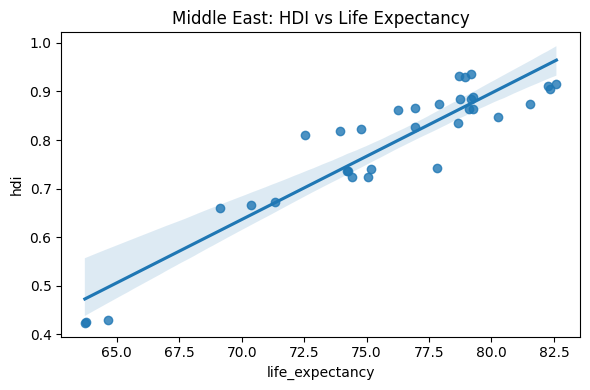

In [ ]:
# PROBLEM 3 – Task 6: Correlation Analysis (HDI with gender and life expectancy)

print("PROBLEM 3 – Task 6: Correlations of HDI with gender development and life expectancy")
print("=" * 95)

# Loop over both regions to repeat the same analysis
for region_name, df in [("South Asia", sa_2020_2022), ("Middle East", me_2020_2022)]:
    # Work on a copy so we do not modify the original frames
    temp = df.copy()

    # Convert key columns to numeric and drop rows with missing data
    temp["hdi"] = pd.to_numeric(temp["hdi"], errors="coerce")
    temp["gender_development"] = pd.to_numeric(temp["gender_development"], errors="coerce")
    temp["life_expectancy"] = pd.to_numeric(temp["life_expectancy"], errors="coerce")
    temp = temp.dropna(subset=["hdi", "gender_development", "life_expectancy"])

    # Compute Pearson correlations between HDI and each component
    corr_gender = temp["hdi"].corr(temp["gender_development"])
    corr_life = temp["hdi"].corr(temp["life_expectancy"])

    print(f"\n{region_name}:")
    print(f"  Corr(HDI, Gender Development):   {corr_gender:.3f}")
    print(f"  Corr(HDI, Life Expectancy):      {corr_life:.3f}")

    # Scatter plot with trendline: HDI vs Gender Development
    plt.figure(figsize=(6, 4))
    sns.regplot(data=temp, x="gender_development", y="hdi")
    plt.title(f"{region_name}: HDI vs Gender Development")
    plt.tight_layout()
    plt.show()

    # Scatter plot with trendline: HDI vs Life Expectancy
    plt.figure(figsize=(6, 4))
    sns.regplot(data=temp, x="life_expectancy", y="hdi")
    plt.title(f"{region_name}: HDI vs Life Expectancy")
    plt.tight_layout()
    plt.show()


For Problem 3 Task 6 I computed Pearson correlations between HDI and the
gender development and life expectancy indices for each region. The scatter
plots with trendlines show how strongly HDI moves with each component and
whether the relationships are weaker or stronger in South Asia or in the
Middle East.


PROBLEM 3 – Task 7: Outliers in HDI and GNI per capita by region (1.5 x IQR rule)

South Asia:
  HDI lower bound: 0.403, upper bound: 0.870
  GNI lower bound: -4688.777, upper bound: 20322.914
  No outliers detected in this region.


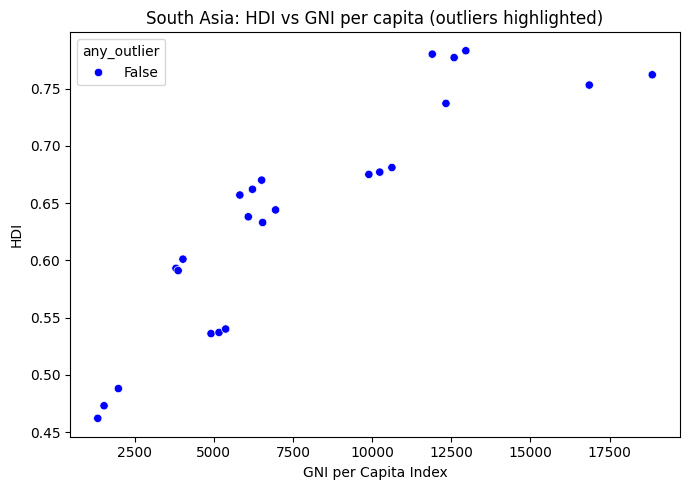


Middle East:
  HDI lower bound: 0.514, upper bound: 1.106
  GNI lower bound: -52693.652, upper bound: 112608.890
  Countries flagged as outliers (HDI or GNI):
country  year   hdi  gross_inc_percap  hdi_outlier  gni_outlier
  Yemen  2020 0.430       1152.015672         True        False
  Yemen  2021 0.425       1112.162989         True        False
  Yemen  2022 0.424       1105.763435         True        False


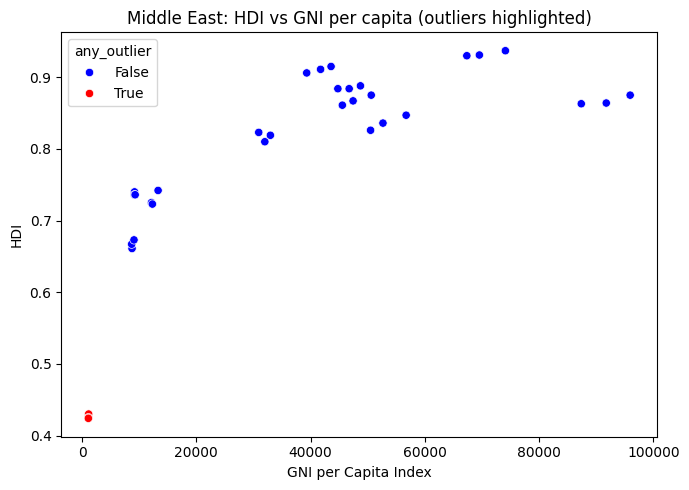

In [ ]:
# PROBLEM 3 – Task 7: Outlier Detection in HDI and GNI per capita

print("PROBLEM 3 – Task 7: Outliers in HDI and GNI per capita by region (1.5 x IQR rule)")
print("=" * 95)

# Helper function to compute IQR bounds for a series
def detect_outliers_iqr(series):
    vals = pd.to_numeric(series, errors="coerce").dropna()
    q1 = vals.quantile(0.25)
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

# Apply the rule separately for South Asia and Middle East
for region_name, df in [("South Asia", sa_2020_2022), ("Middle East", me_2020_2022)]:
    temp = df.copy()

    # Make HDI and GNI per capita numeric
    temp["hdi"] = pd.to_numeric(temp["hdi"], errors="coerce")
    temp["gross_inc_percap"] = pd.to_numeric(temp["gross_inc_percap"], errors="coerce")

    # Get IQR-based lower and upper bounds for each variable
    hdi_lower, hdi_upper = detect_outliers_iqr(temp["hdi"])
    gni_lower, gni_upper = detect_outliers_iqr(temp["gross_inc_percap"])

    # Flag rows where HDI or GNI are outside the bounds
    temp["hdi_outlier"] = (temp["hdi"] < hdi_lower) | (temp["hdi"] > hdi_upper)
    temp["gni_outlier"] = (temp["gross_inc_percap"] < gni_lower) | (temp["gross_inc_percap"] > gni_upper)
    temp["any_outlier"] = temp["hdi_outlier"] | temp["gni_outlier"]

    outliers = temp[temp["any_outlier"]]

    print(f"\n{region_name}:")
    print(f"  HDI lower bound: {hdi_lower:.3f}, upper bound: {hdi_upper:.3f}")
    print(f"  GNI lower bound: {gni_lower:.3f}, upper bound: {gni_upper:.3f}")

    # List countries and years that are flagged as outliers
    if not outliers.empty:
        print("  Countries flagged as outliers (HDI or GNI):")
        print(outliers[['country', 'year', 'hdi', 'gross_inc_percap',
                        'hdi_outlier', 'gni_outlier']].to_string(index=False))
    else:
        print("  No outliers detected in this region.")

    # Scatter plot of HDI vs GNI with outliers highlighted in red
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=temp,
        x="gross_inc_percap",
        y="hdi",
        hue="any_outlier",
        palette={False: "blue", True: "red"}
    )
    plt.title(f"{region_name}: HDI vs GNI per capita (outliers highlighted)")
    plt.xlabel("GNI per Capita Index")
    plt.ylabel("HDI")
    plt.tight_layout()
    plt.show()


For Problem 3 Task 7 I applied the 1.5 × IQR rule on HDI and GNI per capita
to flag unusually high or low values inside each region. The scatter plots of
HDI against GNI per capita highlight these outlier countries in red, helping to
explain which cases do not follow the typical income–development pattern.
